In [ ]:
# For Google Colab only! Remove when downloading to Jupyter Notebook!!!!!
from google.colab import drive
drive.mount('/content/drive')

# Abstract 

Sign language is a way to effectively communicate with people with hearing and speaking disability. In this project, we trained models to help us recognize sign language. The main focus of our project will be the numerical digits (0-9) in sign language, thus there are 10 classes in our dataset and the features of an image is represented by its pixels. To increase the number of images in our dataset, we applied Image Augmentation to the original dataset and concatenate the augmented images with the original dataset. Hence, we trained different models to classify the images to their corresponding numbers. This new dataset was then used to train these models: Logistic Regression, K-Nearest Neighbours (KNN), Convolutional Neural Network (CNN), Transfer Learning models and Gradient Boosting. According to our results, the Transfer learning model (VGG16) is the best to predict our dataset with the highest training and validation accuracy, while Logistic Regression and Gradient Boosting display signs of overfitting. We hope that our project would serve as a baseline for future research to use this technology to improve the daily lives of people with disabilities. 

# Introduction

Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, the orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas. It is primarily used by people with hearing and speaking disabilities to communicate.

Sign language has many benefits in the holistic development of children*(Chris, 2015)* and other areas other than using it to communicate with the deaf.


1.   It enriches and enhances children's cognitive ability, speech development, and emotional control.

2.   People with aphasia (neurological trauma) are unable to communicate coherently, hence with the use of sign language, they can get their message across *(NAA, 2017)*.


There are around 466 million people worldwide who have listening disabilities and 34 million of these are children *(WHO, 2019)*.

Though the benefits of hearing aids are undeniable, not everyone with a hearing disability can afford one. Hearing aids may be more convenient than using sign language as it doesn’t require much effort on both the speaker and listener to learn an entirely new language. However, if the hearing aid is damaged, the user will be unable to communicate, hence this is where sign language comes in handy. As per this article, why hearing aids and sign language are a happy pair, sign language and hearing aids are both essential tools for the hearing impaired, thus it is beneficial for the user to learn sign language *(Snook, 2018)*.

It would be interesting to find out if we can train a model to recognize sign language. For scale, we will only be focusing on digits of sign language. However, if the model can accurately predict the meaning of the sign language, it would be possible to extrapolate to other areas of sign language.

The reason we chose this topic is to bridge the gap between people who cannot understand sign language and want to communicate with those who can only communicate through sign language.

One way to help bridge the gap is to create a smartphone application that reads sign language and translates it in real-time for maximum efficiency. This has already been achieved by students from New York University *(Rogers, 2018)* where they created an augmented reality smartphone application for real-time sign language translation. However, as sign language is not universal, their application only caters to those who use the American Sign Language (ASL). In Singapore,we have our sign language called the Singapore Sign Language (SgSL) which is slightly different from ASL *(Goy, 2017)*. Hence, the augmented reality application will not be able to translate SgSL properly. Therefore, we can build on their idea and create an application that translates SgSL in real-time for the user.

This will also be extremely useful to students who are enrolled in mainstream post-secondary schools. For deaf students who are enrolled in mainstream elementary schools, there will be teachers trained in special needs posted to the schools to co-teach and provide extra help when needed *(Teng, 2017)*. However, at the post-secondary level and above, this help will no longer be easily available. Therefore, with the use of the application, we are thus able to help bridge the gap between the deaf and the hearing community.




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.load("/content/drive/My Drive/MH4510/X.npy")
datay = np.load("/content/drive/My Drive/MH4510/Y.npy")

#Exploratory Data Analysis

- From Kaggle: Sign Language (from numbers 0 to 9) (https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset)
- Image size: 64x64
- Color space: Grayscale
- File format: npy
- Number of classes: 10 (Digits: 0-9)
- Number of participant students: 218
- Number of samples per student: 10



Our datasets are in 2 separate npy files. In the first npy file, our images are stored as a $2062$x$64$x$64$ matrix. Each row of the matrix corresponds to each of the images which are stored as a 64x64 matrix. The second npy file is a matrix with each column representing a digit. For any row, there will be only one entry with “1” and the rest of the entries are “0”. A “1” in a particular column means that the row is representing the digit that the column represents. This is the digit which the image in the same row in the first dataset is representing.


The table below shows a summary of our dataset.

![Picture](https://drive.google.com/uc?id=1wXltF9NURflzkZq4N4pxcWLmiPozjHNS)



In [ ]:
# Observe the structure of the dataset
print(data[0])
print(data.shape)

[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
 [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
 [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
 ...
 [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
 [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
 [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]
(2062, 64, 64)


Here is a sample of how our data looks like. 

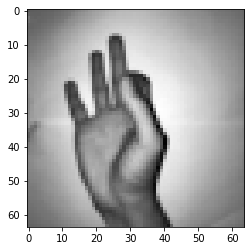

In [ ]:
# # Take a look at some of the images in the dataset
plt.imshow(data[0], cmap='gray')

# Feature Engineering

As our datasets consists of images, our only feature is the pixels. Therefore we will be using the individual pixels as our feature.

#Data Cleaning
Our dataset is relatively clean, hence there is not much cleaning to do. We notice that the the y-value does not correspond to the actual number (i.e, digit 9's output value is 0), hence we change the output value to corresponse to the actual digit that the image represent for easier viewing. Also, as some of our models only accept input data in 3-dimension form (RGB), we have to reshape the dataset in order to fit the dataset into the models. Similarly, we do the same for the output values. 

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

#Order the image according to what they represent
columnx_digit = {0: 9,
                1: 0,
                2: 7,
                3: 6,
                4: 1,
                5: 8,
                6: 4,
                7: 3,
                8: 2,
                9: 5}


#digit-column index relationship dictionary
relation_bw_digit_and_column = {v:k for k, v in columnx_digit.items()}

Y_ordered = np.zeros(datay.shape)

#fill the matrix so that the columns index also corresponds to the digit 
for i in range(datay.shape[1]):
    Y_ordered[:,i] = datay[:,relation_bw_digit_and_column[i]]
    
#set the number of classes that our model have
no_of_classes = 10

#Reshaping the dimension of the data so that we can put it into the model
data_reshaped = data.reshape(data.shape[0],data.shape[1],data.shape[2],1)
print(data_reshaped.shape)


#Reshaping the y ordered data
y_reshaped=[]
for i in Y_ordered:
    arr = i.tolist()
    index = arr.index(1)
    y_reshaped.append(index)  
    
    
y_reshaped = np.asarray(y_reshaped)
print(y_reshaped)


Using TensorFlow backend.


(2062, 64, 64, 1)
[9 9 9 ... 5 5 5]


In [ ]:
# Check how many samples are there for each digit.
Y_ordered.sum(axis=0)

array([205., 206., 206., 206., 207., 207., 207., 206., 208., 204.])

### Application of Image Data Augmentation

Since our data set consists of 2062 images, we feel that it may a bit too small which might cause underfitting when we run them through the prediction models. Hence we apply Image Data Augmentation to expand our data set to achieve a better fitting. Also, we notice that most of the images are taken from the same angle, so to increase the accuracy of our model, we decide to randomly rotate some of the images in the dataset. 

The main idea is to rotate the training set and then concatenate the rotated set to the training data. We choose 30 degrees to be the rotation range which means that an image will be rotated at most 30 degrees clockwise or anti-clockwise. This new training set will be used in all of our prediction models. 

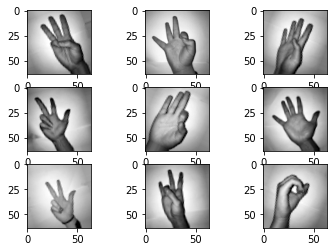

In [ ]:
#Splitting the data into the training set and the test set
from sklearn.model_selection import train_test_split
x_train, X_test_new, y_train_new, y_test = train_test_split(data_reshaped,y_reshaped,test_size=0.25,random_state=0)


#We apply Image Data Augmention to expand our data set, so that we can acheive a better fit.
# convert from int to float
x_train_new = x_train.astype('float32')
#We rotate the images within 30 degrees clockwise and 30 degrees anti clockwise
datagen = ImageDataGenerator(rotation_range=30)
# fit parameters from data
datagen.fit(x_train_new)
# configure batch size and retrieve augmented images: x_batch and its corresponding labels: y_batch

dg = datagen.flow(x_train_new, y_train_new, batch_size= x_train.shape[0])
x_batch, y_batch = dg.next()

for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [ ]:
#We now concatenate our original data with the new expanded data
X_train_new = np.concatenate((x_train, x_batch), axis = 0)

#Reshaping the train set dimension 
X_train = X_train_new.reshape(X_train_new.shape[0], X_train_new.shape[1]*X_train_new.shape[2])



#Reshaping the test set dimension
X_test = X_test_new.reshape(X_test_new.shape[0], X_test_new.shape[1]*X_test_new.shape[2])


#Concatenate our original y train data with the augmented y data
y_train = np.concatenate((y_train_new, y_batch), axis = 0)


#Model 1: Logistic Regression

We first fit a Logistic Regression model and observe its performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logit.predict(X_test)
from sklearn.metrics import accuracy_score
logit_score = accuracy_score(y_test, y_pred, normalize = True)
y_pred_train = logit.predict(X_train)
from sklearn.metrics import accuracy_score
train_log_score = accuracy_score(y_train, y_pred_train, normalize = True)
print(logit_score)
print(train_log_score)

0.7151162790697675
0.9708926261319534


[[41  0  0  0  8  1  3  0  1  1]
 [ 0 42  4  1  0  0  0  3  2  0]
 [ 4  2 23  2  1  0  4  3  3  0]
 [ 1  3  2 43  1  4  0  1  0  0]
 [ 1  1  0  1 27  0 10  3  7  1]
 [ 1  0  0  5  0 44  0  0  1  3]
 [ 1  1  4  0  4  0 34  1  1  1]
 [ 1  2  5  0  5  1  3 33  5  0]
 [ 2  1  1  1  3  0  1  1 38  3]
 [ 0  1  1  0  1  4  0  0  3 44]]


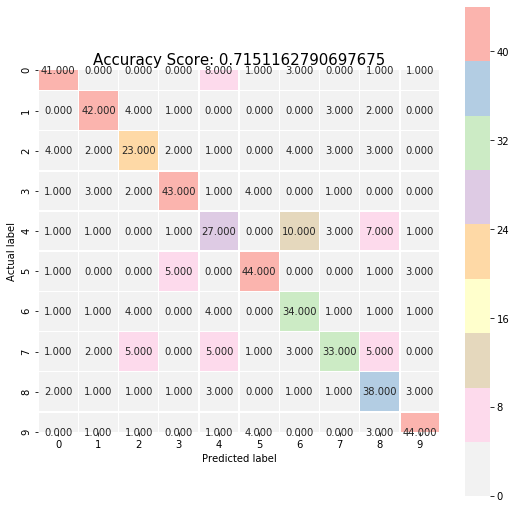

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

plt.figure(figsize=(9,9))
sns.heatmap(confusionmatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logit_score)
plt.title(all_sample_title, size = 15);


#Model 2: K - Nearest Neighbors

Next we train a KNN model and observe its performance. We will do cross-validation to select the value of K.

In [ ]:
#Reshape the original data to fit in the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
data_reshaped_new = data_reshaped.reshape(data_reshaped.shape[0], data_reshaped.shape[1]*data_reshaped.shape[2])
print(data_reshaped_new.shape)

(2062, 4096)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


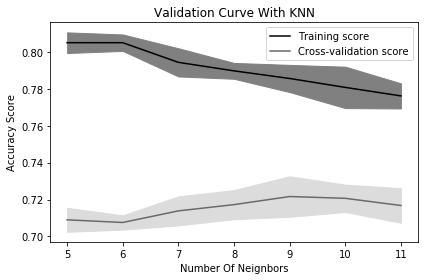

In [ ]:
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(5, 12)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(KNeighborsClassifier(), 
                                             data_reshaped_new, 
                                             y_reshaped, 
                                             param_name="n_neighbors", 
                                             param_range=param_range,
                                              cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With KNN")
plt.xlabel("Number Of Neignbors")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

From the validation curve, the model has the highest test accuracy when K=9, therefore we use this model as our KNN model for classification of digits.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred_knn)
print(knn_score)

y_pred_knn_train = knn.predict(X_train)
knn_train_score = accuracy_score(y_train, y_pred_knn_train)
print(knn_train_score)

0.7306201550387597
0.8091849935316947


#Model 3.1.Convolutional Neural Network
It is a network used specifically for image recognition and classification. Below are the four main operations that the model does:
<cite data-cite="Srivastava, H. (2018, April 25)">(Srivastava, 2018)</cite>

*   Convolution
*   Non-Linearity (ReLu)
*   Pooling
*   Classification 
 



### How does a Convolutional Neural Nework works?

![Picture](https://www.cc.gatech.edu/~san37/img/dl/conv.gif)

The first step is none other than **Convolution** which is the sliding of the matrix in yellow is to extract the features of the input image. By using small squares of input data, Convolution learns image features and works in coordination with pixels.

\begin{equation*}
\begin{pmatrix}
{1} & {0} & {1} \\
0 &  1 & 0 \\
1& 0 & 1
\end{pmatrix}
\end{equation*}

According to the gif above, the filter is in the form of a $33$x$33$ matrix. The yellow matrix will slide over the green image by 1 pixel each time. For each position, element multiplication will occur between the filter and the green image. The sum of the outputs would be transferred into a new matrix which is labeled as the **Convolved Feature**. After covering every single pixel in the image, the Convolved Feature will be completed. 



In CNN, several different filters/kernels are consisting of trainable parameters which can convolve on a given image spatially to detect features like edges and shapes. Through backpropagation, these high numbers of filters essentially learn to capture spatial features from the image based on the learned weights. Stacked filter layers can be used at each successive stage to detect complex spatial shapes from the spatial characteristics. Consequently, they can effectively simplify a given image into a highly abstract representation that is easy to predict *(Ramesh, 2018)*.

For our first layer, we used 20 independent filters. Hence we will obtain 20 Convolved Feature which would be stacked back to back forming a 3D matrix. The dimension this stack of Convolved features would then be $64$x$64$x$10$.


![Picture](https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)

The second step is **Pooling**, for our model, we used Maxpooling which is a function that reduces the spatial size of the Convolved Features to reduce the number of parameters and computation in the network. A $22$x$22$ window is placed over the image and it slides along the image by 2 cells. As it covers a region, it takes the largest number in that region and transfers it into a new output matrix *(Udofia, 2019)*.

The third step will be the **Dropout** feature, it refers to dropping out units in the neural network. A new hyperparameter is introduced that specifies the probability at which outputs of the layer are dropped out, or inversely, the probability at which outputs of the layer are retained. A common value is a probability of 0.5 for retaining the output of each node in a hidden layer, thus it is a regularization method that ignores 50% of pixels to reduce overfitting *(Srivastava, 2014)*.

Between the hidden layers, we perform **batch normalization** to increase speed, performance, and stability by adjusting and scaling the activations. It complements regularization as well to reduce overfitting *(Doukkali, 2018)*. 

For the Convoluted features, we apply **Zero Padding** which looks like the matrix below: 


\begin{equation*}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0\\
{0}&{4} & {3} & {4} & 0\\
0& 2 &  4 & 3 & 0\\
0& 2& 3 & 4 & 0 \\
0 & 0& 0 & 0 & 0
\end{pmatrix}
\end{equation*}

It is a process that systematically adds zeroes to the outer layer of the input matrix. It allows the size of the input to be adjusted to our requirements *(Saxena, 2016)*. 

After **Convolution --> Pooling --> Convolution --> Pooling --> Output Vector**

We proceed to **Flatten** the resulting Convolved features and passed it through the fully connected neural network (ANN). 

Keras provides the SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum. The default learning rate is 0.01 and no momentum is used by default *(Brownlee, 2019)*.

We apply **early stopping** to reduce overfitting. Specifically, in our solution, we included EarlyStopping(monitor='val_accuracy', mode = 'max' patience=3) to define that we wanted to monitor the validation accuracy at each epoch and after the validation accuracy has not improved after three epochs, training is interrupted *(Albon, 2017)*. In max mode, it will stop when the validation accuracy has stopped increasing. 



In [ ]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, ZeroPadding2D, Dropout, Flatten, Dense, Activation

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
def cnn_model(input_shape):
  cnn_model = Sequential()
  # Add a layer of convolutional blocks with 10 filters with size 5x5, then perform batch normalization (which helps in regularization) and run the Relu function.
  cnn_model.add(Conv2D(10, kernel_size=(5,5), input_shape=input_shape))
  cnn_model.add(BatchNormalization(axis=3))
  cnn_model.add(Activation('relu'))

  # Add a max pooling layer with filter of size 2x2. We perform dropout at 0.5 to reduce overfitting. Zero padding is used to retain the information on the edge of the images.
  cnn_model.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model.add(Dropout(0.5))
  cnn_model.add(ZeroPadding2D(padding=(1,1)))

  cnn_model.add(Conv2D(20, kernel_size=(3,3)))
  cnn_model.add(BatchNormalization(axis=3))
  cnn_model.add(Activation('relu'))

  cnn_model.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model.add(Dropout(0.5))

  cnn_model.add(Conv2D(20, kernel_size=(3,3)))
  cnn_model.add(BatchNormalization(axis=3))
  cnn_model.add(Activation('relu'))

  cnn_model.add(MaxPooling2D(pool_size=(2,2)))
  cnn_model.add(Dropout(0.5))

  # Unroll the matrix into a vector and pass into the fully connected layer with 10 units to get our predicted class.
  cnn_model.add(Flatten())
  cnn_model.add(Dense(10, activation="softmax"))

  return cnn_model

In [ ]:
image_size = 64
cnn_model_main = cnn_model((image_size, image_size, 1))

In [ ]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01)
cnn_model_main.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ["accuracy"])
checkpoint_main = ModelCheckpoint("main_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# Stops training when validation accuracy decreases for 3 consecutive epoch.
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)
callbacks_list = [checkpoint_main, es]
fitted_cnn_main = cnn_model_main.fit(X_train_new, y=y_train_cat, validation_data=(X_test_new, y_test_cat), epochs = 150, 
                                     batch_size = 32, callbacks=callbacks_list, shuffle=True)

In [ ]:
#show the train-test accuracy depending on the epoch
def plot_acc_vs_epoch(fit_history):
    plt.plot(fit_history.history['acc'])
    plt.plot(fit_history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()

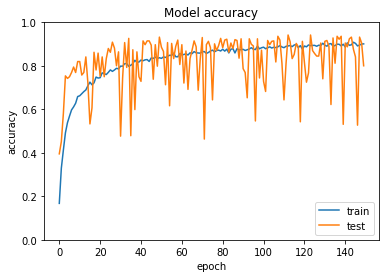

In [ ]:
plot_acc_vs_epoch(fitted_cnn_main)

In [ ]:
# Extracting the training accuaracy and validation accuracy of the last epoch.
training_acc_cnn_main = fitted_cnn_main.history['acc'][-1]
validation_acc_cnn_main = fitted_cnn_main.history['val_acc'][-1]
print(f'The training accuracy is {training_acc_cnn_main:.2f} and the validation accuracy is {validation_acc_cnn_main:.2f}')

The training accuracy is 0.90 and the validation accuracy is 0.80


## 3.2. Transfer Learning
Another method of classifying images is through the process of transfer learning. In transfer learning, the features and weights from the pretrained models are used to train newer models and even handle problems such as having too little datasets, which is the case for our project. This is in contrast to traditional CNN in which the models are built for specific tasks without considering the current available knowledge. <cite>(Sarkar, 2018)</cite>

We will be testing out the following pretrained models available in Keras library:
1. VGG16 *(Simonyan & Zisserman, 2014)*
2. ResNet50 *(He, Zhang, Ren & Sun, 2016)*
3. MobileNet *(Howard et al., 2017)*

All the 3 transfer learning models that we used were pre-trained on the ImageNet dataset as part of the ImageNet Large Scale Visual Recognition Challenge in which the goal is to train a model to classify an image into 1000 possible categories. These models were shown to have a strong ability to generalize well to images that are not in the ImageNet dataset by transfer learning *(Rosebrock, 2017)*. 

VGG16 is known to have **3x3 filters in all the convolution layers** coupled with max pooling which makes it a simple architecture. However, there are 2 drawbacks of VGG16. Firstly, it is slow to train the weights and secondly, the model is over 500MB due to a large number of fully connected nodes and its depth. The first problem is due to the vanishing gradient problem in which the gradients computed via backpropagation are very small, causing the weights update to be slow *(Rosebrock, 2017)*.

Resnet50 is a model that utilizes the concept of skip connection to build deeper models. This allows it to overcome the vanishing gradient problem which is prominent in VGG16 and other deeper models. In addition to the usual convolution layers, the **skip connection** was added from the input layer to the output layer *(Rosebrock, 2019)*. This connection performs identity mapping which allows the model to learn an identity function which ensures that the higher layers will learn at least the same ability of the lower layers *(Dwivedi, 2019)*. Rosebrock (2019) also noted that the usage of global average pooling over the fully-connected layers reduced the model size to 102MB as compared to VGG16. The figure below shows the architecture of ResNet50, with the skip connection.

![Picture](https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_resnet_residual.png)


Mobilenet was introduced by Howard, et.al. (2017) to be used in mobile and embedded vision applications. Mobilenet utilizes the **depthwise separable convolutions** which perform a single convolution on each of the 3 colour channels instead of combining all 3 of them and flattening it. This has the effect of greatly reducing the computation and size of the model as compared to VGG16 and ResNet50 *(Howard, et.al., 2017)*. 


In [ ]:
# For each pre_trained models, it will be flattened and 2 hidden layers, dropout and 1 output layer will be added. 
# The arguments first and second are the number of units in each hidden layer respectively. The unit in the output layer is represented by num_of_class
# The probability of Dropout is represented by dropout_rate 
def additional_layers(pre_trained_model, first, second, num_of_class, dropout_rate=0):
  final_model = Sequential()
  final_model.add(pre_trained_model)
  final_model.add(Flatten())
  final_model.add(Dense(first, activation='relu'))
  final_model.add(Dropout(dropout_rate))
  final_model.add(Dense(second, activation='relu'))
  final_model.add(Dropout(dropout_rate))
  final_model.add(Dense(num_of_class, activation='softmax'))

  return final_model

In [ ]:
# We have to make our images in RGB format.
# To do this we replicated each matrix representing the image 3 times.
X_train_new_2D = X_train_new.reshape(X_train_new.shape[0], X_train_new.shape[1], X_train_new.shape[2])
X_train_rgb = np.repeat(X_train_new_2D[..., np.newaxis], 3, -1)

X_test_new_2D = X_test_new.reshape(X_test_new.shape[0], X_test_new.shape[1], X_test_new.shape[2])
X_test_rgb = np.repeat(X_test_new_2D[..., np.newaxis], 3, -1)

###Pre-trained Model 1: VGG16 
Let us first try just training the last layer of the pre-trained model. 

In [ ]:
from keras.applications import VGG16
# Fix the input image size
image_size=64
# Load the VGG model
vgg_base = VGG16(weights='imagenet',include_top=False,
                 input_shape=(image_size,image_size,3))
vgg_base.trainable = False

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg_final = additional_layers(vgg_base, 1024,1024,10,0.5)

In [ ]:
from keras.optimizers import SGD
# Compile 
sgd = SGD(lr=0.01)
vgg_final.compile(loss='categorical_crossentropy', optimizer=sgd,    metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint("Checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
# Train
#checkpoint_vgg16 = ModelCheckpoint("/content/drive/My Drive/Checkpoints/vgg16_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)
callbacks_list = [es]
fitted_vgg16 = vgg_final.fit(X_train_rgb, y=y_train_cat, validation_data=(X_test_rgb, y_test_cat), epochs = 150, batch_size = 128, callbacks=callbacks_list, shuffle=True)

In [ ]:
# Extracting the training accuaracy and validation accuracy of the last epoch.
training_acc_vgg16 = fitted_vgg16.history['acc'][-1]
validation_acc_vgg16 = fitted_vgg16.history['val_acc'][-1]
print(f'The training accuracy is {training_acc_vgg16:.2f} and the validation accuracy is {validation_acc_vgg16:.2f}')

The training accuracy is 0.92 and the validation accuracy is 0.87


Now let us try unfreezing all layers of the pretrained model and retraining these layers. 

In [ ]:
# Fix the input image size
image_size=64
# Load the VGG model
vgg_base = VGG16(weights='imagenet',include_top=False,
                 input_shape=(image_size,image_size,3))
vgg_base.trainable = True

In [ ]:
vgg_final = additional_layers(vgg_base, 1024,1024,10,0.5)

In [ ]:
# Compile 
sgd = SGD(lr=0.01)
vgg_final.compile(loss='categorical_crossentropy', optimizer=sgd,    metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint("Checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
# Train
#checkpoint_vgg16 = ModelCheckpoint("/content/drive/My Drive/Checkpoints/vgg16_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)
callbacks_list = [es]
fitted_vgg16 = vgg_final.fit(X_train_rgb, y=y_train_cat, validation_data=(X_test_rgb, y_test_cat), epochs = 150, batch_size = 128, callbacks=callbacks_list, shuffle=True)

In [ ]:
# Extracting the training accuaracy and validation accuracy of the last epoch.
training_acc_vgg16 = fitted_vgg16.history['acc'][-1]
validation_acc_vgg16 = fitted_vgg16.history['val_acc'][-1]
print(f'The training accuracy is {training_acc_vgg16:.2f} and the validation accuracy is {validation_acc_vgg16:.2f}')

The training accuracy is 1.00 and the validation accuracy is 1.00


The training accuracy is 100% and the validation accuracy is 100% after unfreezing all layers and retraining them. This is a lot higher compared to when we just unfreeze the top layer. We suspect this is because our images are greyscale images while pre-trained models are usually trained on RGB images, hence there is perhaps a need to retrain all layers. ResNet50 and MobileNet have this problem (model trained on RGB images) as well, hence going forward, we decide to unfreeze all layers and retrain them. 

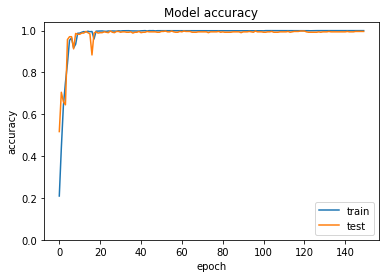

In [ ]:
plot_acc_vs_epoch(fitted_vgg16)

###Pre-trained Model 2: MobileNet

In [ ]:
from keras.applications.mobilenet import MobileNet
# to fix the input image size
image_size=64
# Load the VGG model
mobile_base = MobileNet(include_top=False,
                 input_shape=(image_size,image_size,3))
mobile_base.trainable = True

mobile_final = additional_layers(mobile_base, 1024,1024,10,0.5)

sgd = SGD(lr=0.01)
mobile_final.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #optmizer can change to adam also


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [ ]:
#checkpoint_mobilenet = ModelCheckpoint("/content/drive/My Drive/Checkpoints/mobile_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)
callbacks_list = [es]
fitted_mobile = mobile_final.fit(X_train_rgb, y=y_train_cat, validation_data=(X_test_rgb, y_test_cat), epochs = 150, batch_size = 32, callbacks=callbacks_list, shuffle=True)

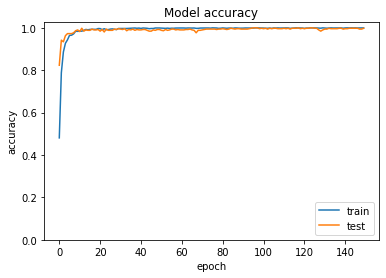

In [ ]:
plot_acc_vs_epoch(fitted_mobile)

In [ ]:
training_acc_mobile = fitted_mobile.history['acc'][-1]
validation_acc_mobile = fitted_mobile.history['val_acc'][-1]
print(f'The training accuracy is {training_acc_mobile:.2f} and the validation accuracy is {validation_acc_mobile:.2f}')

The training accuracy is 1.00 and the validation accuracy is 1.00


###Pre-trained Model 3: ResNet50

In [ ]:
from keras.applications.resnet import ResNet50
image_size=64
resnet50_base = ResNet50(include_top=False, input_shape=(image_size,image_size,3)) # Remove the first 3 fully connected layers from the pre-trained model.
for layer in resnet50_base.layers:
	layer.trainable = True

resnet50_final = additional_layers(resnet50_base, 1024,1024,10,0.5)

sgd = SGD(lr=0.01)
resnet50_final.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #optmizer can change to adam also

94773248/94765736 [==============================] - 4s 0us/step


In [ ]:
#checkpoint_resnet50 = ModelCheckpoint("/content/drive/My Drive/Checkpoints/resnet50_weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)
callbacks_list = [es]
fitted_resnet50 = resnet50_final.fit(X_train_rgb, y=y_train_cat, validation_data=(X_test_rgb, y_test_cat), epochs = 150, batch_size = 32, callbacks=callbacks_list, shuffle=True)

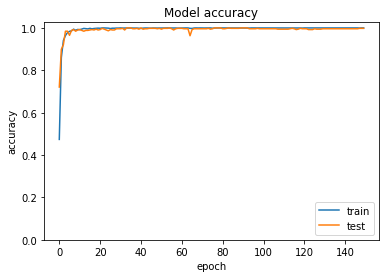

In [ ]:
plot_acc_vs_epoch(fitted_resnet50)

In [ ]:
# Extracting the training accuaracy and validation accuracy of the last epoch.
training_acc_resnet50 = fitted_resnet50.history['acc'][-1]
validation_acc_resnet50 = fitted_resnet50.history['val_acc'][-1]
print(f'The training accuracy is {training_acc_resnet50:.2f} and the validation accuracy is {validation_acc_resnet50:.2f}')

The training accuracy is 1.00 and the validation accuracy is 1.00


#Model 4. Gradient Boosting

Gradient boosting, which is an **ensemble** model that creates a strong classifier from several weak classifiers, relies on the fact that the best possible next model, when combined with the previous models, minimizes the overall prediction error. 
The key idea here is to set the target outcomes for this next model to minimize the error. The target outcomes for each case are set based on the gradient of the error concerning the prediction. Each new model will take a step in the direction that minimizes the prediction error, in the space of possible predictions for each training case.

There are three elements in Gradient Boosting (*Brownlee, 2019*):
- Loss function
- Weak learner
- Additive model

Gradient boosting identifies shortcomings by using gradients in the loss function. The loss function is a measure to indicate how good are the model’s coefficients at fitting the underlying data. The loss function will depend on what we are trying to optimize. 

Decision trees are used as the weak learner in gradient boosting. 

For the in built gradient boosting model, the loss function to be optimized is the 'deviance'. The learning rate by default is 0.01

Loss function *(Holmes, 2002)*:
\begin{equation*}
D_{i} = -2\sum_{k}n_{ik}log(p_{ik})
\end{equation*}

For the $k$ - component of the gradient *(Hastie, 2009)*:
\begin{equation*}
  -\frac{\partial L(y_{i}, f(x_{i}))}{\partial f(x_{i})} = I(y_{i} = G_{k}) - p_{k}(x_{i})
\end{equation*}

For tree parametrization we use the default settings in the in built model. 

There are a few ways in which Gradient Boosting deals with over-fitting. One such way is to control the tree depth. Tree depth controls the depth of the individual trees. Smaller depth trees are computationally efficient but require more trees, whereas higher depth trees allow the algorithm to take note of unique interations but it increases the risk of over-fitting. (*Greenwell, 2019*) 

However, based from our validation curve, we decided to tune the max_depth to 2, even though the default max_depth is 3. **Cross-validation** allows us to tune hyperparameters (max depth) to reduce over-fitting.
The remaining tree parameters are as follows : 

max_features=None, </br>max_leaf_nodes=None, </br>
min_impurity_decrease=0.0, </br>
min_impurity_split=None, </br>
min_samples_leaf=1, </br> min_samples_split=2, </br>
min_weight_fraction_leaf=0.0 </br>

Trees are added one at a time, and existing trees in the model are not changed. A gradient descent procedure will be used to minimize the loss when trees are being added. After calculating the loss, we add a tree to the model that reduces the loss (ie. follow the gradient). We can do this by parameterizing the tree and then modify the parameters of the tree and move in the direction that reduces the residual loss. 

The output for the new tree is then added to the output of the existing sequence of trees to improve the final output of the model. 

A fixed number of trees are added or training will stop once the loss reaches an acceptable level or it no longer improves on an external validation dataset. 

Gradient boosting trains many models in an additive and sequential manner. 


Illustration of Gradient Boost (*Zhang, Mayer & Dauvilliers, 2018*):

![Picture](https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting.png)

## Comparing Gradient Boost and Random Forest

The difference between Gradient Boosting and Random Forest can be seen as follows in the given table (*Grover, 2019*):

![Picture](https://drive.google.com/uc?id=1kWbpkUVHZ-zIJ4D721OmLj59ylGvHeHu)

The two main differences between Random Forest and Gradient Boosting are:

How trees are built: Random Forests builds each tree independently while Gradient Boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners. 

Combining results: Random Forests combine results at the end of the process (by averaging or "majority rules") while Gradient Boosting combines results along the way.


In [ ]:
# This function calls the validation_curve functions and plots out the curve.
from sklearn.model_selection import validation_curve
def plot_validation_curve(my_classifier, X, y, param_name, param_range, cv, title, X_label, y_label):
  # Calculate accuracy on training and test set using range of parameter values
  train_scores, test_scores = validation_curve(my_classifier, 
                                              X = X, 
                                              y = y, 
                                              param_name = param_name, 
                                              param_range = param_range,
                                              cv = cv, 
                                              scoring = "accuracy", 
                                              n_jobs = -1)


  # Calculate mean and standard deviation for training set scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  # Calculate mean and standard deviation for test set scores
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot mean accuracy scores for training and test sets
  plt.plot(param_range, train_mean, label="Training score", color="black")
  plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

  # Plot accurancy bands for training and test sets
  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

  # Create plot
  plt.title(title)
  plt.xlabel(X_label)
  plt.ylabel(y_label)
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show()

#### We fit a random forest classifier and compare it with Gradient Boost model.
We use 3-fold cross vaildation to select the max depth to prevent over-fitting.

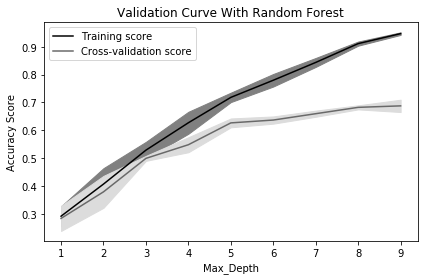

In [ ]:
from sklearn.ensemble import RandomForestClassifier
plot_validation_curve(RandomForestClassifier(n_estimators=10, random_state=0),
                      X=data_reshaped_new, 
                      y=y_reshaped, 
                      param_name='max_depth', 
                      param_range=range(1,10),
                      cv=3,
                      title = 'Validation Curve With Random Forest',
                      X_label = 'Max_Depth',
                      y_label = 'Accuracy Score')

In [ ]:
random_clf = RandomForestClassifier(n_estimators=10, max_depth=5)
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred_random = random_clf.predict(X_train)
y_test_pred_random = random_clf.predict(X_test)

from sklearn.metrics import accuracy_score
training_acc_RF = accuracy_score(y_train, y_train_pred_random)
validation_acc_RF = accuracy_score(y_test, y_test_pred_random)

print(f'The training accuracy is {training_acc_RF:.2f} and the validation accuracy is {validation_acc_RF:.2f}')

The training accuracy is 0.62 and the validation accuracy is 0.62


###Now we fit the Gradient Boost model.
We use 3-fold cross vaildation to select the max depth to prevent over-fitting.



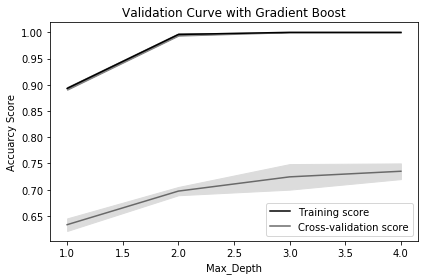

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
plot_validation_curve(GradientBoostingClassifier(),
                      X=data_reshaped_new, 
                      y=y_reshaped, 
                      param_name='max_depth', 
                      param_range=range(1,5),
                      cv=3,
                      title='Validation Curve with Gradient Boost',
                      X_label='Max_Depth',
                      y_label='Accuarcy Score')

In [ ]:
gb_clf = GradientBoostingClassifier(max_depth=2)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_train_predgb = gb_clf.predict(X_train)
y_test_predgb = gb_clf.predict(X_test)

from sklearn.metrics import accuracy_score
training_acc_boost = accuracy_score(y_train, y_train_predgb)
validation_acc_boost = accuracy_score(y_test, y_test_predgb)

print(f'The training accuracy is {training_acc_boost:.2f} and the validation accuracy is {validation_acc_boost:.2f}')

The training accuracy is 0.96 and the validation accuracy is 0.72


###Comparing the performance of the newly fitted CNN and the 3 pre-trained models

In [ ]:
import pandas as pd
model_name = ['Logistic Regression', 'KNN','New CNN','VGG16', 'MobileNet','ResNet50', 'Random Forest', 'Gradient Boosting']
training_accuracy = np.array([train_log_score, knn_train_score, training_acc_cnn_main,training_acc_vgg16, training_acc_mobile, training_acc_resnet50, training_acc_RF, training_acc_boost])
validation_accuracy = np.array([logit_score, knn_score, validation_acc_cnn_main,validation_acc_vgg16, validation_acc_mobile, validation_acc_resnet50, validation_acc_RF, validation_acc_boost])

training_validation_accuracy = np.vstack((training_accuracy, validation_accuracy)) # Stack the 2 arrays vertically
summary_accuracy = pd.DataFrame(data = training_validation_accuracy, index = ['Training Accuracy', 'Validation Accuracy'], columns = model_name)


In [ ]:
summary_accuracy

,Logistic Regression,KNN,New CNN,VGG16,MobileNet,ResNet50,Random Forest,Gradient Boosting
Training Accuracy,0.970893,0.809185,0.901035,1.000000,0.999677,1.000000,0.622898,0.956339
Validation Accuracy,0.715116,0.730620,0.800388,0.996124,0.998062,0.998062,0.616279,0.715116


From the above results, there seems to be a problem of overfitting in both logistic regression and gradient boosting models, judging from how the training accuracy greatly exceeds the validation accuracy. This is to be expected for both models. Logistic regression tend to overfit when there are many features for the model, and in our case, each of the pixels of the image is considered to be an individual features, hence for the logistic model, we will have 64*64 = 4096 features which will lead to overfitting issues. For gradient boosting models, it is mentioned above that it is prone to overfitting, hence the result is no surprise. 

Also, in line with our expectations, CNN models performed the best, especially the transfer learning models. This may be because our dataset is relatively small hence it will perform much better on transfer learning models as they are already trained on a large data set compared to the CNN we trained from scratch. 

# Conclusion 
We have shown that it is possible to train a model to successfully recognize digits of sign language, and we believe this can be extrapolated to other areas of sign languages as well, such as alphabets or even words. This is significant because it can potentially bridge the gap between people who do not know sign language and people who can only communicate in sign languages. We hope that further research can be done in this area.  

# References
Albon, C. (2017, December 20). Neural Network Early Stopping. Retrieved from https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/

Brownlee, J. (2019). A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ [Accessed 17 Nov. 2019].

Brownlee, J. (2019, October 3). Understand the Impact of Learning Rate on Neural Network Performance. Retrieved from https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

Chris, O. (2015, February 11). 5 Ways Sign Language Benefits the Hearing: How ASL Improves Communication. Retrieved from https://www.speechbuddy.com/blog/language-development/5-ways-sign-language-benefits-the-hearing/

Culfaz, F. (2018). Transfer Learning using Mobilenet and Keras. Retrieved from: https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

Doukkali, F. (2018, June). Batch Normalization in Neural Networks. Retrieved from: https://www.kdnuggets.com/2018/06/batch-normalization-neural-networks.html

Dwidevi, P. (2019). Understanding and Coding a ResNet in Keras. Retrieved from:https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

Goy, P. (2017, February 2). Building bridges with sign language. Retrieved from https://www.straitstimes.com/singapore/building-bridges-with-sign-language.

Greenwell, B. (2019, October 19). Hands-On Machine Learning with R. Retrieved from https://bradleyboehmke.github.io/HOML/gbm.html#ref-esl.

Grover, P. (2019, August 1). Gradient Boosting from scratch. Retrieved from https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

Hastie, T., Tibshirani, R., & Friedman, J. (2009). Boosting and additive trees. In The elements of statistical learning (pp. 337-387). Springer, New York, NY. https://www.stat.auckland.ac.nz/~yee/784/files/ch10BoostingAdditiveTrees.pdf

He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778). Retrieved from: https://arxiv.org/pdf/1512.03385.pdf

Holmes, S. (2002, January 12). Classification trees. Retrieved from http://statweb.stanford.edu/~susan/courses/b494/index/node45.html

Howard, A. G., Zhu, M., Chen, B., Kalenichenko, D., Wang, W., Weyand, T., Andreetto, M. & Adam, H. (2017). Mobilenets: Efficient convolutional neural networks for mobile vision applications. arXiv preprint arXiv:1704.04861. Retrieved from: https://arxiv.org/pdf/1704.04861.pdf

National Aphasia Association. (2017, August 13). Sign Language and Aphasia. Retrieved from https://www.aphasia.org/stories/sign-language-aphasia/

Ramesh, S. (2018, May 26). A guide to an efficient way to build neural network architectures- Part II: Hyper-parameter? Retrieved from https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

Rogers, K. (2018, March 27). Augmented Reality App Can Translate Sign Language Into Spoken English, and Vice Versa. Retrieved from https://www.vice.com/en_us/article/zmgnd9/app-to-translate-sign-language.

Rosebrock, A. (2017). ImageNet: VGGNet, ResNet, Inception, and Xception with Keras. Retrieved from https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

Sarkar, D. (2018, November 17). A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning. Retrieved from https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

Saxena, A. (2016, June 29). Convolutional Neural Networks (CNNs): An Illustrated Explanation. Retrieved from https://blog.xrds.acm.org/2016/06/convolutional-neural-networks-cnns-illustrated-explanation/

Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556. Retrieved from: http://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/simonyan15.pdf

Snook, M. (2018, November 13). Why hearing aids and sign language are a happy pair. Retrieved from https://www.hearinglikeme.com/why-hearing-aids-and-sign-language-are-a-happy-pair/

Srivastava, H. (2018, April 25). Convolutional Neural Networks Explained. Retrieved from https://magoosh.com/data-science/convolutional-neural-networks-explained/.

Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. The journal of machine learning research, 15(1), 1929-1958. http://jmlr.org/papers/v15/srivastava14a.html

Teng, A. (2017, September 16). Mayflower Primary to take in deaf pupils. Retrieved from https://www.straitstimes.com/singapore/education/mayflower-primary-to-take-in-deaf-pupils.

Udofia, U. (2019, September 20). Basic Overview of Convolutional Neural Network (CNN). Retrieved from https://medium.com/dataseries/basic-overview-of-convolutional-neural-network-cnn-4fcc7dbb4f17

World Health Organization. (2019, March 20). Deafness and hearing loss. Retrieved from https://www.who.int/news-room/fact-sheets/detail/deafness-and-hearing-loss

Zhang, Z., Mayer, G., Dauvilliers, Y., Plazzi, G., Pizza, F., Fronczek, R., ... & Da Silva, A. M. (2018). Exploring the clinical features of narcolepsy type 1 versus narcolepsy type 2 from European Narcolepsy Network database with machine learning. Scientific reports, 8(1), 10628.  https://doi.org/10.1038/s41598-018-28840-w